In [1]:
import os
import time
import errno
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)

https://dhlottery.co.kr/gameResult.do?method=byWin

In [2]:
file = open('E:\\STUDY\\로또\\948당첨번호.xls')
file_lines = file.readlines()
file.close()

In [3]:
def remove_duplicated(num_list):
    num_list = set(num_list)
    num_list = list(num_list)
    
    return num_list

In [4]:
def reversed_number(num_list):
    reversed_num_list = list()
    for i in range(1, 46):
        if i not in num_list:
            reversed_num_list.append(i)
    
    return reversed_num_list

In [5]:
scores = [0] * 46

def update_scores(num_list, score=1):
    for num in num_list:
        scores[num] += score

In [6]:
num_list = list()
new_num_list = list()

for file_line in file_lines:
    if '</tr>' in file_line and len(new_num_list) == 7:
        num_list.append(new_num_list)
    if '<tr>' in file_line:
        new_num_list = list()
    if '<td>' in file_line and '</td>' in file_line:
        if len(file_line) < 17:
            num = re.findall("\d+", file_line)
            if len(num) > 0:
                new_num_list.append(int(num[0]))

display(num_list[0:10])

[[13, 18, 30, 31, 38, 41, 5],
 [3, 8, 17, 20, 27, 35, 26],
 [9, 18, 19, 30, 34, 40, 20],
 [9, 10, 15, 30, 33, 37, 26],
 [2, 13, 16, 19, 32, 33, 42],
 [1, 8, 13, 36, 44, 45, 39],
 [10, 12, 18, 35, 42, 43, 39],
 [12, 14, 25, 27, 39, 40, 35],
 [3, 15, 20, 22, 24, 41, 11],
 [4, 11, 28, 39, 42, 45, 6]]

### 빈도분산

1. 같은 구간에서 수가 몰아 나오기는 힘들다.
2. 그렇다고 모든 구간에서 수가 고르게 나오기도 힘들다.
3. 따라서 같은 구간에서 수가 나와봤자 최대 2수가 한계일 것이다

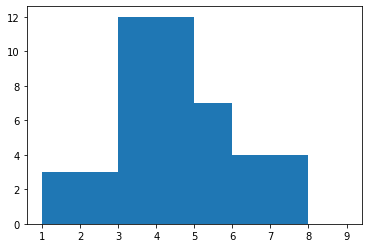

[]
[5, 21, 26]
[6, 24, 37]
[1, 7, 11, 14, 16, 19, 28, 29, 32, 35, 40, 45]
[2, 8, 9, 12, 22, 23, 25, 27, 30, 31, 33, 34]
[4, 17, 20, 38, 39, 41, 42]
[15, 36, 43, 44]
[3, 10, 13, 18]


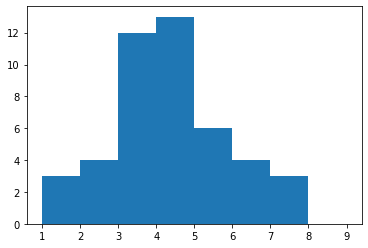

[]
[5, 21, 26]
[6, 14, 24, 37]
[1, 7, 9, 11, 16, 19, 28, 29, 32, 35, 40, 45]
[2, 8, 12, 17, 22, 23, 25, 27, 30, 31, 33, 34, 42]
[4, 20, 38, 39, 41, 44]
[15, 18, 36, 43]
[3, 10, 13]


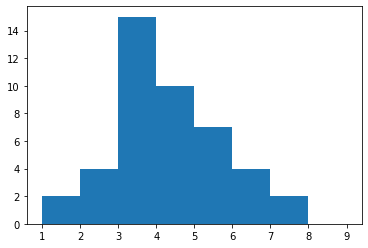

[26]
[5, 21]
[6, 14, 24, 37]
[1, 2, 7, 9, 11, 16, 19, 28, 29, 32, 33, 34, 35, 40, 45]
[8, 12, 17, 22, 23, 25, 27, 30, 31, 42]
[4, 20, 38, 39, 41, 43, 44]
[3, 15, 18, 36]
[10, 13]


In [7]:
def frequency_analysis(latest_num_list, number_of_bins=10):
    count_num_list = [0] * 46
    for nums in latest_num_list:
        for num in nums[:6]:
            count_num_list[num] += 1
    
    plt.hist(count_num_list, bins=range(1,number_of_bins))
    plt.show()
    return count_num_list

tmp = frequency_analysis(num_list[0:30])
for j in range(0, 8): 
    values = list()
    for i in range(1, 46):
        if tmp[i] == j:
            values.append(i)      
    print(values)

tmp = frequency_analysis(num_list[0:29])
for j in range(0, 8): 
    values = list()
    for i in range(1, 46):
        if tmp[i] == j:
            values.append(i)      
    print(values)
    
tmp = frequency_analysis(num_list[0:28])
for j in range(0, 8): 
    values = list()
    for i in range(1, 46):
        if tmp[i] == j:
            values.append(i)      
    print(values)

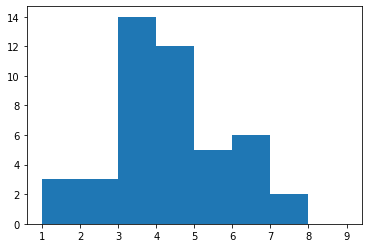

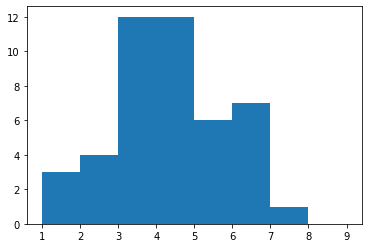

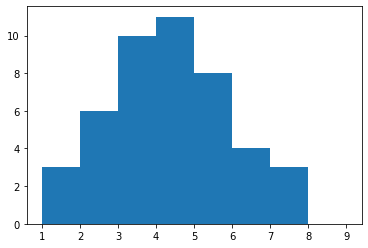

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [8]:
check_weeks = 3

check_table = [0] * 10
for i in range(10):
    check_table[i] = [0] * 20

for week in range(check_weeks):
    winner = num_list[week]
    tmp = frequency_analysis(num_list[(week+1):(week+30)])
    for j in range(1, 8): 
        values = list()
        for i in range(1, 46):
            if tmp[i] == j:
                values.append(i)
                if i in winner:
                    check_table[j][len(values) - 1] += 1
        #print(values)
display(check_table)

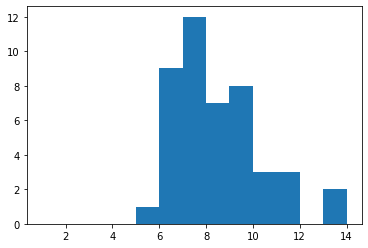

[]
[]
[]
[]
[45]
[5, 9, 11, 24, 25, 26, 30, 34, 40]
[1, 6, 8, 10, 14, 19, 20, 28, 29, 32, 33, 37]
[2, 7, 12, 15, 17, 31, 35]
[4, 21, 23, 27, 36, 41, 43, 44]
[16, 22, 42]
[3, 13, 39]
[]
[18, 38]
[]


In [9]:
tmp = frequency_analysis(num_list[0:60], 15)

for j in range(1, 15): 
    values = list()
    for i in range(1, 46):
        if tmp[i] == j:
            values.append(i)      
    print(values)

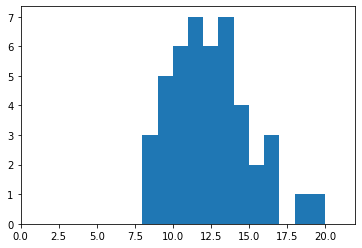

[]
[]
[]
[9, 11, 29]
[5, 20, 24, 26, 40]
[1, 6, 8, 10, 30, 31]
[7, 14, 25, 33, 35, 36, 41]
[2, 12, 15, 28, 37, 45]
[13, 16, 19, 21, 32, 34, 44]
[4, 17, 23, 27]
[42, 43]
[3, 22, 38]
[]
[18]
[39]
[]
[]


In [10]:
tmp = frequency_analysis(num_list[0:90], 22)

for j in range(5, 22): 
    values = list()
    for i in range(1, 46):
        if tmp[i] == j:
            values.append(i)      
    print(values)

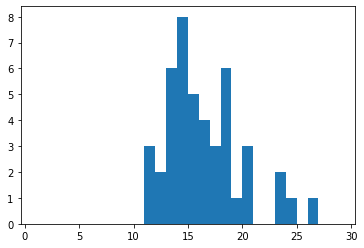

[]
[20, 24, 29]
[7, 40]
[1, 6, 9, 11, 25, 37]
[5, 8, 10, 15, 21, 31, 35, 41]
[12, 23, 26, 27, 36]
[2, 4, 32, 34]
[14, 30, 44]
[3, 17, 19, 22, 33, 45]
[13]
[16, 28, 42]
[]
[]
[18, 38]
[43]
[]
[39]
[]
[]
[]


In [11]:
tmp = frequency_analysis(num_list[0:120], 30)

for j in range(10, 30): 
    values = list()
    for i in range(1, 46):
        if tmp[i] == j:
            values.append(i)      
    print(values)

In [12]:
last_10 = num_list[0:10]

count_last_10 = [0] * 46
for nums in last_10:
    for num in nums:
        count_last_10[num] += 1

display(pd.DataFrame(count_last_10).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,1,1,2,1,1,1,0,2,2,2,2,2,3,1,2,1,1,3,2,3,0,1,0,1,1,2,2,1,0,3,1,1,2,1,3,1,1,1,4,2,2,3,1,1,2


In [13]:
last_3 = num_list[0:3]

count_last_3 = [0] * 46
for nums in last_3:
    for num in nums:
        count_last_3[num] += 1
        
display(pd.DataFrame(count_last_3).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,2,1,2,0,0,0,0,0,1,1,0,0,2,1,0,0,1,1,0,0,1,0,1,1,0,0,0,0


### 포지션 분석

포지션분석은 단순하게 출현한 공의 빈도가 아닌 지정된 위치에 출현한 공의 빈도를 사용합니다.<br>
즉. 당첨번호 6개를 작은 번호부터 순서대로 나열한 후 총 6구간으로 나눈뒤 그 위치에 출현한 빈도를 봅니다.<br>
예를 들면 645회차까지 60게임중 최근 5게임은 다음과 같습니다.

645회  1  4 16 26 40 41<br>
644회  5 13 17 23 28 36<br>
643회 15 24 31 32 33 40<br>
642회  8 17 18 24 39 45<br>
641회 11 18 21 36 37 43<br>

17번을 예로 들면 17번은 2번 출현하였습니다. 그런데 645회때는 3번째에 위치하고 642회때는 2번째에 위치합니다.<br>
따라서 17번의 포지션 분석은 2구간에서 빈도1 , 3구간에서 빈도 1이 되는 것입니다.<br>
이렇게 통계집단에서 각 위치에 출현한 수의 빈도를 누적하여 포지션별 숫자의 순위를 정합니다.<br>

규칙 1. 1순위 숫자가 2개 이하이면 2순위 3순위 숫자도 취한다.<br>
규칙 2. 1순위 숫자가 3개이상이면 1순위 숫자만 취한다.<br>
규칙 3. 2순위 숫자가 여러개라면 모두 취한다.<br>
규칙 4. 3순위 숫자가 여러개라면 모두 버린다.<br>

In [14]:
def position_analysis(latest_num_list):
    candidate_set = list()

    for i in range(0, 6):
        collect = [0] * 46
        result = ''
        #count = 0
        print('{}구간'.format(i + 1))
        for num in latest_num_list:
            #print('{}  -  {}'.format(count, num))
            #count += 1
            collect[num[i]] += 1
            #print(collect)

        ranking = [0] * 5
        curr_count = 100
        ranking_idx = 0

        for j in range(1, 46):
            max = 0
            for k in range(1, 46):
                if collect[k] > max:
                    max = collect[k]
                    idx = k

            if max > 0:
                result += '{}({}) '.format(idx, collect[idx])
                if ranking_idx < 4:
                    if curr_count > collect[idx]:
                        curr_count = collect[idx]
                        ranking_idx += 1
                        ranking[ranking_idx] = list()
                    ranking[ranking_idx].append(idx)

                collect[idx] = 0
            else:
                break

        print(result)
        print('1th:{},  2th:{},  3th:{}'.format(ranking[1], ranking[2], ranking[3]))

        candidate_set += ranking[1]
        if len(ranking[1]) <= 2:
            candidate_set += ranking[2]
            if len(ranking[3]) == 1:
                candidate_set += ranking[3]
        print(candidate_set)
        print()
        collect.clear()
        ranking.clear()

    candidate_set = remove_duplicated(candidate_set)
    excepted_set = reversed_number(candidate_set)
    print('Candidate numbers : {}'.format(candidate_set))
    print('Excepted numbers : {}'.format(excepted_set))
    
    return candidate_set, excepted_set
    
candidate_set, excepted_set = position_analysis(num_list[0:60])


1구간
2(8) 3(8) 1(7) 4(6) 7(6) 5(4) 9(4) 6(3) 8(2) 10(2) 13(2) 16(2) 12(1) 14(1) 18(1) 19(1) 21(1) 23(1) 
1th:[2, 3],  2th:[1],  3th:[4, 7]
[2, 3, 1]

2구간
11(5) 15(5) 6(4) 8(4) 13(4) 3(3) 4(3) 10(3) 14(3) 18(3) 19(3) 21(3) 5(2) 7(2) 9(2) 12(2) 16(2) 24(2) 27(2) 17(1) 26(1) 32(1) 
1th:[11, 15],  2th:[6, 8, 13],  3th:[3, 4, 10, 14, 18, 19, 21]
[2, 3, 1, 11, 15, 6, 8, 13]

3구간
12(5) 16(5) 17(5) 13(4) 18(4) 20(4) 29(4) 23(3) 25(3) 28(3) 10(2) 14(2) 15(2) 22(2) 30(2) 8(1) 11(1) 19(1) 21(1) 24(1) 26(1) 31(1) 32(1) 34(1) 37(1) 
1th:[12, 16, 17],  2th:[13, 18, 20, 29],  3th:[23, 25, 28]
[2, 3, 1, 11, 15, 6, 8, 13, 12, 16, 17]

4구간
22(5) 38(5) 18(4) 21(4) 31(4) 20(3) 23(3) 27(3) 30(3) 33(3) 17(2) 24(2) 26(2) 32(2) 35(2) 36(2) 13(1) 14(1) 15(1) 16(1) 19(1) 25(1) 28(1) 34(1) 39(1) 40(1) 42(1) 
1th:[22, 38],  2th:[18, 21, 31],  3th:[20, 23, 27, 30, 33]
[2, 3, 1, 11, 15, 6, 8, 13, 12, 16, 17, 22, 38, 18, 21, 31]

5구간
39(6) 27(4) 35(4) 36(4) 38(4) 42(4) 22(3) 33(3) 34(3) 25(2) 26(2) 28(2) 29(2) 31(2) 

### 최근 10회차 미출수

In [15]:
def shown_or_not(latest_num_list):
    shown = list()
    for num in latest_num_list:
        shown += num[:6]

    shown = set(shown)
    shown = list(shown)

    not_shown = list()
    for i in range(1, 46):
        if i not in shown:
            not_shown.append(i)
    
    return shown, not_shown

shown, not_shown = shown_or_not(num_list[0:10])

candidate_set = remove_duplicated(candidate_set + not_shown)
excepted_set = reversed_number(candidate_set)

print()
print('Candidate numbers : {}'.format(candidate_set))
print('Excepted numbers : {}'.format(excepted_set))


Candidate numbers : [1, 2, 3, 5, 6, 7, 8, 11, 12, 13, 15, 16, 17, 18, 21, 22, 23, 26, 27, 29, 31, 35, 36, 38, 39, 41, 42, 43, 44]
Excepted numbers : [4, 9, 10, 14, 19, 20, 24, 25, 28, 30, 32, 33, 34, 37, 40, 45]


In [16]:
update_scores(candidate_set)
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0


# 로또9단

In [17]:
def none_shown(latest_num_list):
    result_list = [0] * len(latest_num_list)
    duplicated = [0] * 46
    idx_lines = 0
    
    for nums in latest_num_list:
        result_list[idx_lines] = list() 
        for num in nums[:6]:
            if num not in duplicated:
                duplicated.append(num)
                result_list[idx_lines].append(num)
        idx_lines += 1
    return result_list

### 단골출연 위치

* 4주차 3구 위치
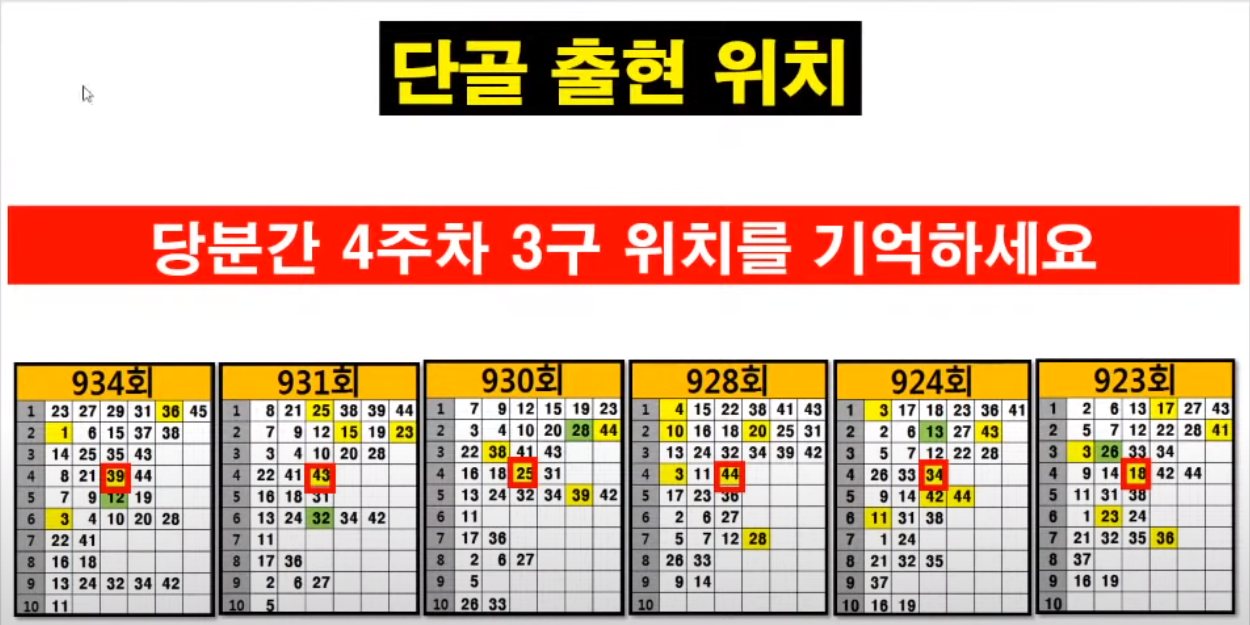

In [18]:
none_shown(num_list[0:20])

[[13, 18, 30, 31, 38, 41],
 [3, 8, 17, 20, 27, 35],
 [9, 19, 34, 40],
 [10, 15, 33, 37],
 [2, 16, 32],
 [1, 36, 44, 45],
 [12, 42, 43],
 [14, 25, 39],
 [22, 24],
 [4, 11, 28],
 [],
 [29],
 [7],
 [],
 [],
 [23],
 [6],
 [],
 [21],
 []]

In [19]:
check_weeks = 4

check_table = [0] * 20
for i in range(20):
    check_table[i] = [0] * 6

winner = num_list[0]
weight = 1  #check_weeks
for i in range(1, check_weeks):
    none_shown_table = none_shown(num_list[i:(20 + i)])
    row = 0
    for none_shown_list in none_shown_table:
        col = 0
        for none_shown_num in none_shown_list:
            if none_shown_num in winner:
                check_table[row][col] += weight    
            col += 1
        row += 1
    winner = none_shown_table[0]  
    if weight > 1:
        weight -= 1
    else:
        weight = 1
display(check_table)

[[1, 0, 0, 1, 0, 0],
 [0, 1, 0, 2, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 3, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 0],
 [1, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

### 패턴분석

In [20]:
update_scores([2, 3, 4, 5, 6], 1)
update_scores([8, 9, 15, 16], 2)
update_scores([17, 18, 19, 24, 25, 26], 1)
update_scores([20, 21, 27, 28, 34, 35], 2)
update_scores([23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42], 2)
update_scores([33, 34, 35, 40, 41, 42], 2)
update_scores([36, 37, 38, 43, 44, 45], 2)
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,1,2,2,1,2,2,1,3,2,0,1,1,1,0,3,3,2,2,1,2,3,1,3,3,3,4,5,4,1,2,3,2,4,6,7,3,4,5,3,4,5,5,3,3,2


In [21]:
#세로 5,6,7라인 최근 7주간 미출수
update_scores([5, 6, 7, 12, 13, 14, 19, 20, 21, 26, 27, 28, 33, 34, 35, 40, 41, 42])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,1,2,2,1,3,3,2,3,2,0,1,2,2,1,3,3,2,2,2,3,4,1,3,3,3,5,6,5,1,2,3,2,5,7,8,3,4,5,3,5,6,6,3,3,2


In [22]:
#세로 5,6,7라인 최근 7주간 미출수(특히 가로 3,4,5,6)
update_scores([19, 20, 21, 26, 27, 28, 33, 34, 35, 40, 41, 42])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,1,2,2,1,3,3,2,3,2,0,1,2,2,1,3,3,2,2,3,4,5,1,3,3,3,6,7,6,1,2,3,2,6,8,9,3,4,5,3,6,7,7,3,3,2


In [23]:
#세로 7라인 최근 미출수
update_scores([7, 14, 21, 28, 35, 42])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,1,2,2,1,3,3,3,3,2,0,1,2,2,2,3,3,2,2,3,4,6,1,3,3,3,6,7,7,1,2,3,2,6,8,10,3,4,5,3,6,7,8,3,3,2


In [24]:
#최근 8주간 미출수
update_scores([8, 16, 24])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,1,2,2,1,3,3,3,4,2,0,1,2,2,2,3,4,2,2,3,4,6,1,3,4,3,6,7,7,1,2,3,2,6,8,10,3,4,5,3,6,7,8,3,3,2


In [25]:
#최근 13주간 미출수
update_scores([26, 34, 42])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,1,2,2,1,3,3,3,4,2,0,1,2,2,2,3,4,2,2,3,4,6,1,3,4,3,7,7,7,1,2,3,2,6,9,10,3,4,5,3,6,7,9,3,3,2


In [26]:
#최근 10주간 미출수
update_scores([26, 34, 28])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,1,2,2,1,3,3,3,4,2,0,1,2,2,2,3,4,2,2,3,4,6,1,3,4,3,8,7,8,1,2,3,2,6,10,10,3,4,5,3,6,7,9,3,3,2


In [27]:
#최근 10주간 미출수
update_scores([28, 34, 42])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,1,2,2,1,3,3,3,4,2,0,1,2,2,2,3,4,2,2,3,4,6,1,3,4,3,8,7,9,1,2,3,2,6,11,10,3,4,5,3,6,7,10,3,3,2


In [28]:
#미출기간표 둘째, 세로 3,4, 라인
update_scores([17, 18, 32, 38, 30, 33, 31, 45, 37, 35, 43, 19, 42])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,1,2,2,1,3,3,3,4,2,0,1,2,2,2,3,4,3,3,4,4,6,1,3,4,3,8,7,9,1,3,4,3,7,11,11,3,5,6,3,6,7,11,4,3,3


In [29]:
#미출기간표 셋째, 3 ~ 6주 구간
update_scores([4, 20, 32, 38, 44, 1, 3, 30, 33, 36, 39, 23, 27, 31, 45, 6, 15, 37])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,2,2,3,2,3,4,3,4,2,0,1,2,2,2,4,4,3,3,4,5,6,1,4,4,3,8,8,9,1,4,5,4,8,11,11,4,6,7,4,6,7,11,4,4,4


In [30]:
#미출기간표 넷째, 8 ~ 9주 구간
update_scores([8, 21, 9, 12, 19])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,2,2,3,2,3,4,3,5,3,0,1,3,2,2,4,4,3,3,5,5,7,1,4,4,3,8,8,9,1,4,5,4,8,11,11,4,6,7,4,6,7,11,4,4,4


In [31]:
#미출수 구간 다섯째
update_scores([28, 41, 24, 24, 26])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,2,2,3,2,3,4,3,5,3,0,1,3,2,2,4,4,3,3,5,5,7,1,4,6,3,9,8,10,1,4,5,4,8,11,11,4,6,7,4,6,8,11,4,4,4


In [32]:
#연번
update_scores([2, 10, 13, 22, 29, 40])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,2,3,3,2,3,4,3,5,3,1,1,3,3,2,4,4,3,3,5,5,7,2,4,6,3,9,8,10,2,4,5,4,8,11,11,4,6,7,4,7,8,11,4,4,4


In [33]:
#1끝수
update_scores([1, 21, 31, 41], 2)
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,4,3,3,2,3,4,3,5,3,1,1,3,3,2,4,4,3,3,5,5,9,2,4,6,3,9,8,10,2,4,7,4,8,11,11,4,6,7,4,7,10,11,4,4,4


In [34]:
#2끝수
update_scores([2, 12, 22, 32, 42])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,4,4,3,2,3,4,3,5,3,1,1,4,3,2,4,4,3,3,5,5,9,3,4,6,3,9,8,10,2,4,7,5,8,11,11,4,6,7,4,7,10,12,4,4,4


In [35]:
#3끝수
update_scores([23, 33, 43], 2)
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,4,4,3,2,3,4,3,5,3,1,1,4,3,2,4,4,3,3,5,5,9,3,6,6,3,9,8,10,2,4,7,5,10,11,11,4,6,7,4,7,10,12,6,4,4


In [36]:
#4끝수
update_scores([24, 34, 44])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,4,4,3,2,3,4,3,5,3,1,1,4,3,2,4,4,3,3,5,5,9,3,6,7,3,9,8,10,2,4,7,5,10,12,11,4,6,7,4,7,10,12,6,5,4


In [37]:
#7끝수
update_scores([7, 17, 27, 37], 2)
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,4,4,3,2,3,4,5,5,3,1,1,4,3,2,4,4,5,3,5,5,9,3,6,7,3,9,10,10,2,4,7,5,10,12,11,4,8,7,4,7,10,12,6,5,4


In [38]:
#8끝수
update_scores([18, 28, 38])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,4,4,3,2,3,4,5,5,3,1,1,4,3,2,4,4,5,4,5,5,9,3,6,7,3,9,10,11,2,4,7,5,10,12,11,4,8,8,4,7,10,12,6,5,4


In [39]:
#9끝수
update_scores([9, 19, 39], 2)
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,4,4,3,2,3,4,5,5,5,1,1,4,3,2,4,4,5,4,7,5,9,3,6,7,3,9,10,11,2,4,7,5,10,12,11,4,8,8,6,7,10,12,6,5,4


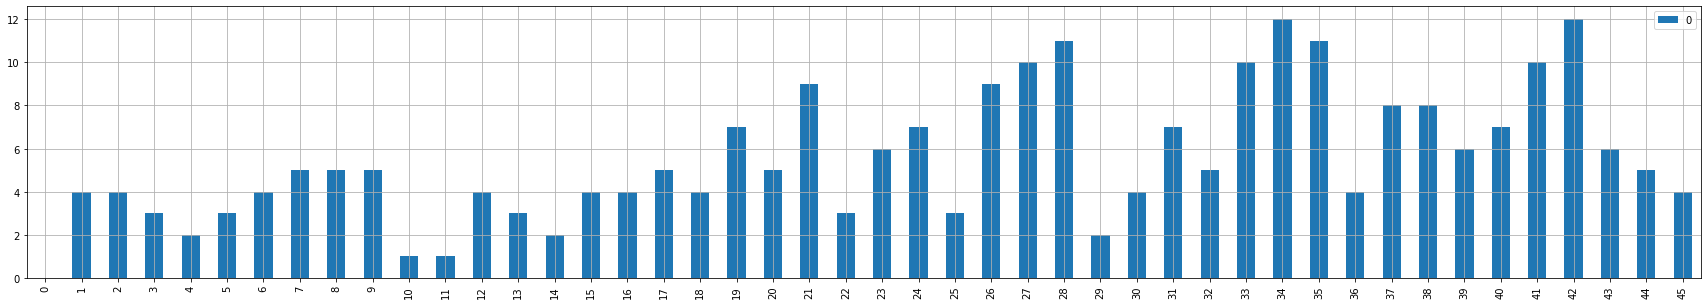

In [40]:
df = pd.DataFrame(scores)
df.plot(kind='bar', figsize=(30, 5))
plt.grid()

In [41]:
#첫째 최근 6주 이내가 강한 회차


weeks = 6
candidate_set = list()

for i in range(0, 5):
    for nums in none_shown(num_list[i:weeks + i]):
        if nums != 0:
            candidate_set += nums

candidate_set = remove_duplicated(candidate_set)
print(candidate_set)
print()

update_scores(candidate_set)
display(pd.DataFrame(scores).T)

[1, 2, 3, 4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,5,5,4,3,3,4,5,6,6,2,2,5,4,3,5,5,6,5,8,6,9,4,6,8,4,9,11,12,2,5,8,6,11,13,12,5,9,9,7,8,11,13,7,6,5


In [42]:
#둘쩨, 최근 6주 이내 세로 1,2라인
weeks = 6
candidate_set = list()

for i in range(0, 5):
    count = 0
    for nums in none_shown(num_list[i:weeks + i]):
        if nums != 0:
            candidate_set += nums
            
        count += 1
        if count >= 2:
            break

candidate_set = remove_duplicated(candidate_set)
print(candidate_set)
print()

update_scores(candidate_set)
display(pd.DataFrame(scores).T)

[1, 2, 3, 8, 9, 10, 13, 15, 16, 17, 18, 19, 20, 27, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 44, 45]



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,6,6,5,3,3,4,5,7,7,3,2,5,5,3,6,6,7,6,9,7,9,4,6,8,4,9,12,12,2,6,9,7,12,14,13,6,10,10,7,9,12,13,7,7,6


In [43]:
#셋쩨, 최근 6주 이내 세로 1,2라인
weeks = 2
candidate_set = list()

for i in range(0, 2):
    for nums in none_shown(num_list[i:weeks + i]):
        if nums != 0:
            candidate_set += nums
            
candidate_set = remove_duplicated(candidate_set)
print(candidate_set)
print()

update_scores(candidate_set, 2)
display(pd.DataFrame(scores).T)

[34, 3, 35, 38, 8, 41, 9, 40, 13, 17, 18, 19, 20, 27, 30, 31]



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,6,6,7,3,3,4,5,9,9,3,2,5,7,3,6,6,9,8,11,9,9,4,6,8,4,9,14,12,2,8,11,7,12,16,15,6,10,12,7,11,14,13,7,7,6


In [44]:
#넷쩨, 최근 미출연 1~2주 구간

update_scores([4, 44, 36, 1, 39, 45, 23, 38, 43, 14, 8, 19])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,7,6,7,4,3,4,5,10,9,3,2,5,7,4,6,6,9,8,12,9,9,4,7,8,4,9,14,12,2,8,11,7,12,16,15,7,10,13,8,11,14,13,8,8,7


In [45]:
#다섯쩨, 최근 미출연 1~2주 구간
weeks = 10
pickup = [[0, 0], [0, 5], [1, 4], [2, 0], [2, 1], [3, 0], [3, 1], [4, 0], [4, 1], [5, 1], [7, 0], [8, 0], [9, 0]]
candidate_set = list()

for i in range(0, 7):
    LL = none_shown(num_list[i:weeks + i])
    
    for j in pickup:
        candidate_set.append(LL[j[0]][j[1]])

candidate_set = remove_duplicated(candidate_set)
print(candidate_set)
print()

update_scores(candidate_set)
display(pd.DataFrame(scores).T)

IndexError: list index out of range

In [ ]:
#여섯쩨, 통계상 출연 임박
weeks = 10
candidate_set = list()

for i in range(0, 10):
    LL = none_shown(num_list[i:weeks + i])
    candidate_set += LL[5]

candidate_set = remove_duplicated(candidate_set)
print(candidate_set)
print()

update_scores(candidate_set, 2)
display(pd.DataFrame(scores).T)

In [ ]:
df = pd.DataFrame(scores)
df.plot(kind='bar', figsize=(30, 5))
plt.grid()